# NIDHI NIGAM

In [1]:
# Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st        
import numpy as np
import statistics as stat

In [2]:
#Reading the Data Set
df=pd.read_csv("./ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
#Checking for null values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
#Find duplicate rows
duplicate_rows = df[df.duplicated()]
#Remove duplicate rows
df = df.drop_duplicates()

In [6]:
#dropiing the same information column for salary
df=df.drop(['salary','salary_currency'], axis=1)


In [7]:
df.to_csv("output_data_NN/salaries.csv")

In [8]:
#renaming employment types 
df['employment_type']=df['employment_type'].replace("FT", "Full-time")
df['employment_type']=df['employment_type'].replace("PT", "Part-time")
df['employment_type']=df['employment_type'].replace("CT", "Contractual")
df['employment_type']=df['employment_type'].replace("FL", "Freelancer")

In [9]:
#renaming company size
df['company_size']=df['company_size'].replace("L", "Large")
df['company_size']=df['company_size'].replace("M", "Medium")
df['company_size']=df['company_size'].replace("S", "Small")

In [10]:
#Finding the number of rows and column of Data set
a, b = df.shape
print("Data_Set shape: rows {} & columns {}".format(a, b))

Data_Set shape: rows 2584 & columns 9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary_in_usd       2584 non-null   int64 
 5   employee_residence  2584 non-null   object
 6   remote_ratio        2584 non-null   int64 
 7   company_location    2584 non-null   object
 8   company_size        2584 non-null   object
dtypes: int64(3), object(6)
memory usage: 201.9+ KB


In [12]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,2584.000000,2584.000000,2584.000000
mean,2022.301084,133409.280186,50.483746
std,0.749179,67136.837329,48.163707
min,2020.000000,5132.000000,0.000000
25%,2022.000000,84975.000000,0.000000
50%,2022.000000,130000.000000,50.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


In [13]:
# Employment_Type (Univariant Analysis)
employment_type = df["employment_type"].value_counts()
employment_type

Full-time      2547
Part-time        17
Contractual      10
Freelancer       10
Name: employment_type, dtype: int64

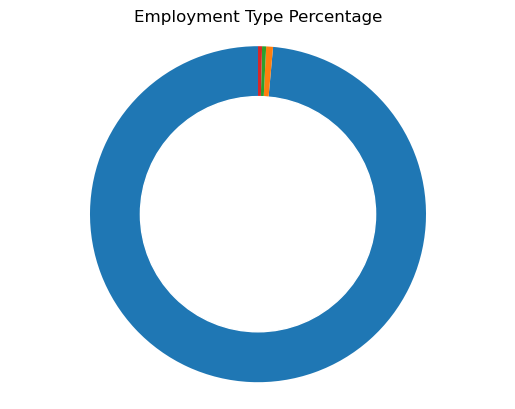

In [30]:
import matplotlib.pyplot as plt

# Example data
# labels = ['A', 'B', 'C', 'D']
sizes = [2547, 17, 10, 10]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes,  startangle=90)

# Draw a white circle in the middle to create the donut effect
circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.title('Employment Type Percentage')



# Saving Plot to output_data_NN

plt.savefig("output_data_NN/Fig1_employtype.png")
plt.show()




In [15]:
# After the univariant analysis of this dataset for the employment type,the conclusion can be that 98.56% of Data Science Jobs
#falls in to Full Time employemnet type.

# company_location (Univariant Analysis)

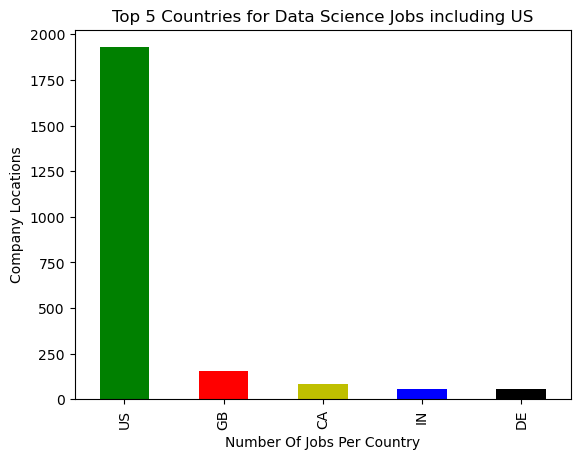

In [16]:
#Top 5 company loations (including US)

company_locations_counts=df["company_location"].value_counts()
top5_company_locations_us= company_locations_counts.head(5)

top5_company_locations_us.plot(
    kind="bar",
    color=["g","r","y","b","k"],
    title="Top 5 Countries for Data Science Jobs including US",
    xlabel = "Number Of Jobs Per Country", 
    ylabel ="Company Locations",

)
# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig2_complocs.png")
plt.show()



In [17]:
#Top 5 company loations (Excluding US)

new_df = df[df["company_location"]!= "US"]
new_df
company_location_counts = new_df["company_location"].value_counts()
top5_company_location = company_location_counts.head()
top5_company_location

GB    155
CA     83
IN     57
DE     55
ES     44
Name: company_location, dtype: int64

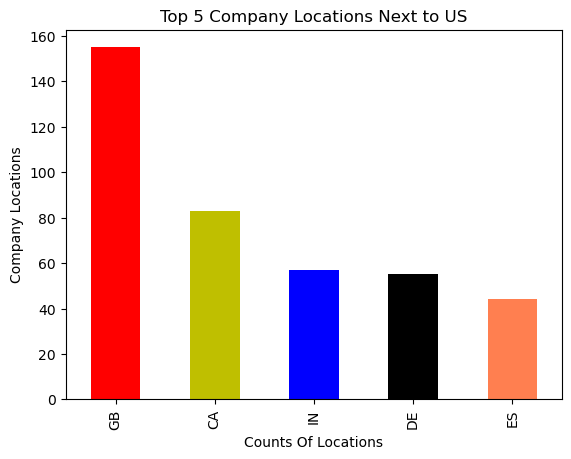

In [18]:

top5_company_location.plot(
    kind="bar",
    color=["r","y","b","k","coral"],
    title="Top 5 Company Locations Next to US",
    xlabel = "Counts Of Locations", 
    ylabel ="Company Locations",
    
)

# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig2_complocs_noUS.png")
plt.show()

In [19]:
#ANALYSIS

#After looking in to the univariant anlysis, We may see that the companies located in USA 
#is already hosting more than 90% jobs. If we remove the USA from the anaysis, The next five countries for stake 
#holders to experience a good competition, will be Great Britain, Canada, India , Germany and Spain. 


# Pair Plotting or Bivariant Analysis

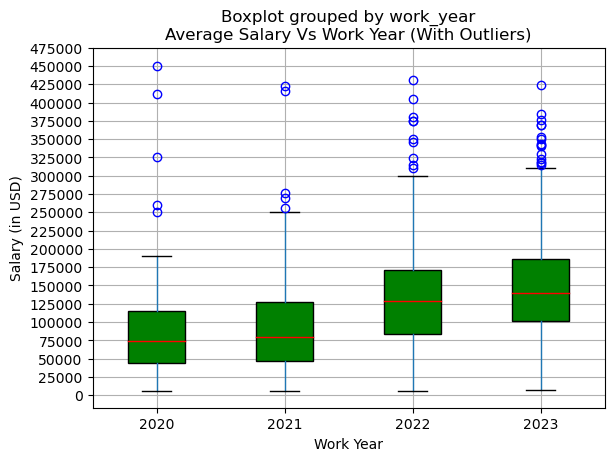

In [43]:
# Salary vs. Experience Level
a="blue"
b="red"
c="green"

df.boxplot(
    column=["salary_in_usd"], 
    by=["work_year"], 
    patch_artist=True, 
    boxprops=dict(facecolor=c), 
    flierprops=dict(color=a, markeredgecolor=a), 
    medianprops=dict(color=b)
)
plt.title('Average Salary Vs Work Year (With Outliers)')
plt.xlabel('Work Year')
plt.ylabel('Salary (in USD)')


y_ticks = np.arange(0, 500000, 25000)  
plt.yticks(y_ticks)
# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig3_salary_workyear_outliers.png")

plt.show()






In [21]:
# Removing outliers in salary_in_usd for different categories of experience_level: Salary vs. Experience Level 


df_remove_outlier1=df[(df["salary_in_usd"]<250000)&(df["work_year"]==2020)]
df_remove_outlier2=df[(df["salary_in_usd"]<225000)&(df["work_year"]==2021)]
df_remove_outlier3=df[(df["salary_in_usd"]<295000)&(df["work_year"]==2022)]
df_remove_outlier4=df[(df["salary_in_usd"]<310000)&(df["work_year"]==2023)]
# dataframes = [df_remove_outlier1,df_remove_outlier2, df_remove_outlier3, df_remove_outlier4]
dataframes = [df_remove_outlier1,df_remove_outlier2, df_remove_outlier3, df_remove_outlier4]
final_df_remove_outlier = pd.concat(dataframes)  #pd.concat(dataframes)
pd.set_option('display.max_rows', None)
#final_df_remove_outlier



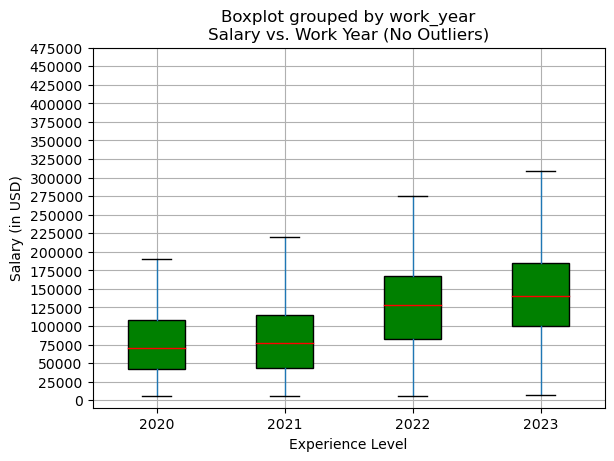

In [42]:
a="blue"
b="red"
c="green"
final_df_remove_outlier.boxplot(column=["salary_in_usd"], by=["work_year"], patch_artist=True, boxprops=dict(facecolor=c), flierprops=dict(color=a, markeredgecolor=a), medianprops=dict(color=b))



plt.title('Salary vs. Work Year (No Outliers)')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')

y_ticks = np.arange(0, 500000, 25000)  
plt.yticks(y_ticks)
# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig3_salary_workyear_nooutliers.png")
plt.show()



In [23]:
# This data do have a lot of outliers and median salry levels drop significantly after removing outliers But with
#or with out outliers after comparing the box plot we can deduce that median salaries were almost same in year 
#2020 and 2021 however in year 2022 and 2023 it got a substantial increase.



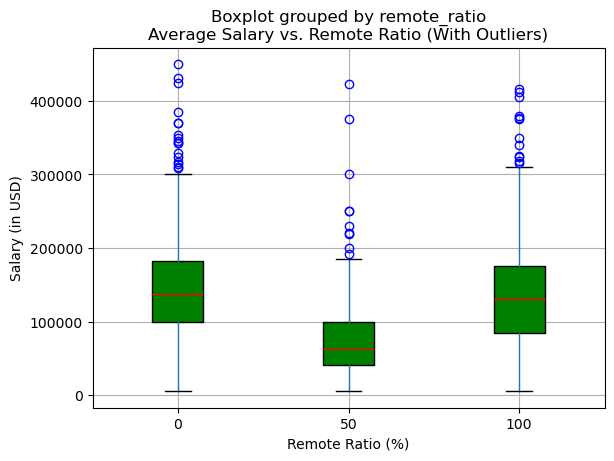

In [24]:
# Salary vs. Experience Level
a="blue"
b="red"
c="green"
df.boxplot(
    column=["salary_in_usd"], 
    by=["remote_ratio"], 
    patch_artist=True, 
    boxprops=dict(facecolor=c), 
    flierprops=dict(color=a, markeredgecolor=a), 
    medianprops=dict(color=b)
)
plt.title('Average Salary vs. Remote Ratio (With Outliers)')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary (in USD)')

# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig4_salary_remoteratio_outliers.png")
plt.show()


# If we analyze this box plot for the given dataset, we can see that hybrid model 
#does not work well in terms of salaries. Even if we choose 100% remote or 100% in Office job type,
#we may be able to get much better salaries than in hybrid model.

In [25]:
# Removing outliers in salary_in_usd for different categories of experience_level: Salary vs. Experience Level 


df_remove_outliera=df[(df["salary_in_usd"]<300000)&(df["remote_ratio"]==0)]
df_remove_outlierb=df[(df["salary_in_usd"]<185000)&(df["remote_ratio"]==50)]
df_remove_outlierc=df[(df["salary_in_usd"]<315000)&(df["remote_ratio"]==100)]

dataframes = [df_remove_outliera,df_remove_outlierb, df_remove_outlierc]
final_df_remove_outlierr =pd.concat(dataframes)
pd.set_option('display.max_rows', None)
#final_df_remove_outlierr


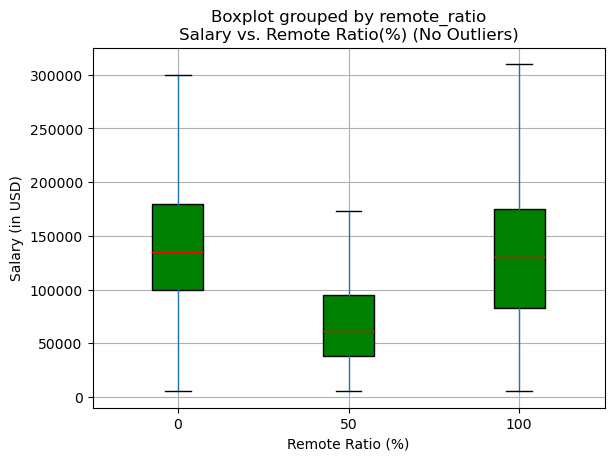

In [26]:
a="blue"
b="red"
c="green"
final_df_remove_outlierr.boxplot(column=["salary_in_usd"], by=["remote_ratio"], patch_artist=True, boxprops=dict(facecolor=c), flierprops=dict(color=a, markeredgecolor=a), medianprops=dict(color=b))
plt.title('Salary vs. Remote Ratio(%) (No Outliers)')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary (in USD)')

# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig4_salary_remoteratio_nooutliers.png")
plt.show()



In [27]:
# Same as in the previous case this data also have a lot of outliers and median salry levels drop significantly 
#after removing outliers But with or with out outliers after comparing the box plot we can deduce that median 
#salaries were sustantially less for the hybrid model as compared to fully remote or in office work model.

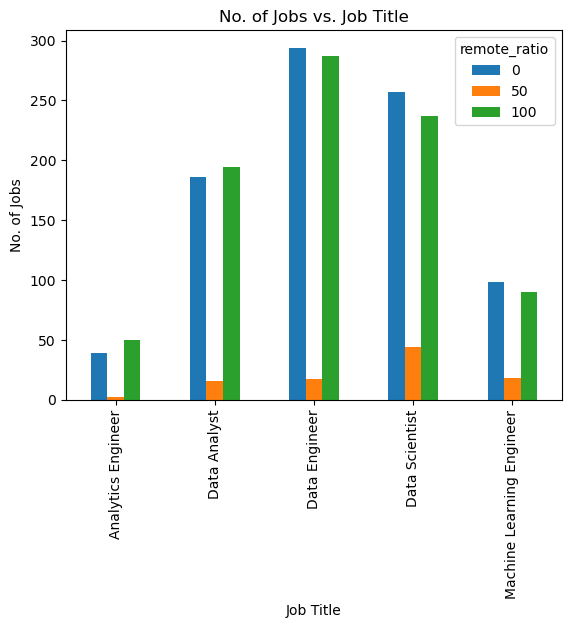

In [28]:
# JOB TITLE VS REMOTE RATIO

reduced_dataframe=df.groupby(["job_title"]).remote_ratio.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series=reduced_dataframe.groupby(["job_title"])["no_of_jobs"].sum().nlargest(5)
making_dataframe=largest_five_residence_series.to_frame().reset_index()
final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["job_title"].isin(making_dataframe["job_title"])]
pivot_dataframe_plotting=final_dataframe_largefive_residence.pivot(index="job_title", columns ="remote_ratio", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. of Jobs vs. Job Title')
plt.xlabel('Job Title')
plt.ylabel('No. of Jobs')
plt.show()
